Posterior Comparison -- Beer 3 Pos
===================

Compares the results obtained from LDA with last sample only and by averaging over many samples.

In [58]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import seaborn as sns
sns.set(color_codes=True)

import sys
basedir = '../'
sys.path.append(basedir)

from lda_for_fragments import Ms2Lda
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import sys

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload



In [59]:
n_topics = 300
alpha = 50.0/n_topics
beta = 0.1

# using beer 3 ...
fragment_filename = basedir + 'input/relative_intensities/Beer_3_T10_POS_fragments_rel.csv'
neutral_loss_filename = basedir + 'input/relative_intensities/Beer_3_T10_POS_losses_rel.csv'
mzdiff_filename = None
ms1_filename = basedir + 'input/relative_intensities/Beer_3_T10_POS_ms1_rel.csv'
ms2_filename = basedir + 'input/relative_intensities/Beer_3_T10_POS_ms2_rel.csv'

Run LDA using last sample only
--------------------------------------------

In [60]:
n_samples = 500
n_burn = 0 # if 0, then only the last sample is used
n_thin = 1 # unused when n_burn == 0

In [61]:
ms2lda_last = Ms2Lda.lcms_data_from_R(fragment_filename, neutral_loss_filename, mzdiff_filename, 
                                 ms1_filename, ms2_filename)

Data shape (856, 1664)


In [62]:
ms2lda_last.run_lda(n_topics, n_samples, n_burn, n_thin, alpha, beta)

Fitting model...
CGS LDA initialising
......................................................................................
Using Numba for LDA sampling
Preparing words
Preparing Z matrix
DONE
Sample 1   Log joint likelihood = -3318093.318 
Sample 2   Log joint likelihood = -2208490.467 
Sample 3   Log joint likelihood = -1609922.294 
Sample 4   Log joint likelihood = -1414140.858 
Sample 5   Log joint likelihood = -1337783.834 
Sample 6   Log joint likelihood = -1295240.877 
Sample 7   Log joint likelihood = -1267716.821 
Sample 8   Log joint likelihood = -1248524.369 
Sample 9   Log joint likelihood = -1234490.592 
Sample 10   Log joint likelihood = -1224017.902 
Sample 11   Log joint likelihood = -1214830.492 
Sample 12   Log joint likelihood = -1206397.963 
Sample 13   Log joint likelihood = -1197718.346 
Sample 14   Log joint likelihood = -1192390.040 
Sample 15   Log joint likelihood = -1187082.506 
Sample 16   Log joint likelihood = -1182191.599 
Sample 17   Log joint likelihoo

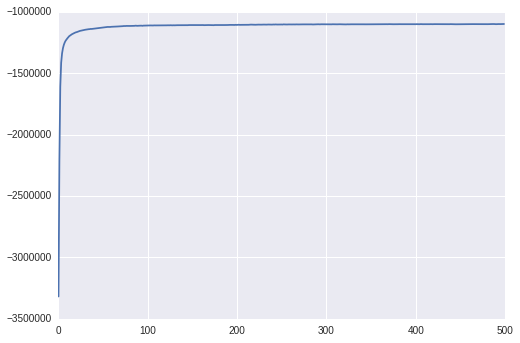

In [63]:
ms2lda_last.plot_log_likelihood()

Run LDA averaging over samples
------------------------------------------

Draw 500 posterior samples, discarding the first 250 as burn-in samples and taking every 5th sample after burn-in for the averaging.

In [64]:
n_samples = 500
n_burn = n_samples/2
n_thin = 5

In [65]:
ms2lda_avg = Ms2Lda.lcms_data_from_R(fragment_filename, neutral_loss_filename, mzdiff_filename, 
                                 ms1_filename, ms2_filename)

Data shape (856, 1664)


In [66]:
ms2lda_avg.run_lda(n_topics, n_samples, n_burn, n_thin, alpha, beta)

Fitting model...
CGS LDA initialising
......................................................................................
Using Numba for LDA sampling
Preparing words
Preparing Z matrix
DONE
Burn-in 1 
Burn-in 2 
Burn-in 3 
Burn-in 4 
Burn-in 5 
Burn-in 6 
Burn-in 7 
Burn-in 8 
Burn-in 9 
Burn-in 10 
Burn-in 11 
Burn-in 12 
Burn-in 13 
Burn-in 14 
Burn-in 15 
Burn-in 16 
Burn-in 17 
Burn-in 18 
Burn-in 19 
Burn-in 20 
Burn-in 21 
Burn-in 22 
Burn-in 23 
Burn-in 24 
Burn-in 25 
Burn-in 26 
Burn-in 27 
Burn-in 28 
Burn-in 29 
Burn-in 30 
Burn-in 31 
Burn-in 32 
Burn-in 33 
Burn-in 34 
Burn-in 35 
Burn-in 36 
Burn-in 37 
Burn-in 38 
Burn-in 39 
Burn-in 40 
Burn-in 41 
Burn-in 42 
Burn-in 43 
Burn-in 44 
Burn-in 45 
Burn-in 46 
Burn-in 47 
Burn-in 48 
Burn-in 49 
Burn-in 50 
Burn-in 51 
Burn-in 52 
Burn-in 53 
Burn-in 54 
Burn-in 55 
Burn-in 56 
Burn-in 57 
Burn-in 58 
Burn-in 59 
Burn-in 60 
Burn-in 61 
Burn-in 62 
Burn-in 63 
Burn-in 64 
Burn-in 65 
Burn-in 66 
Burn-in 67 
Burn-in 68 

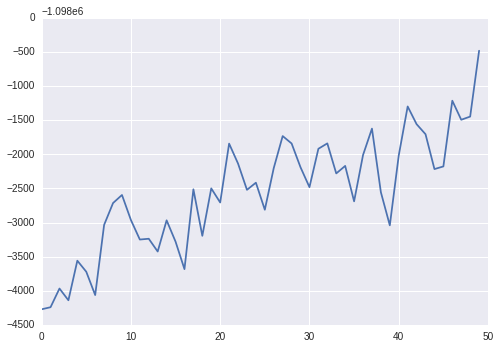

In [67]:
ms2lda_avg.plot_log_likelihood()

Comparison
----------------------

<h3>Document-Topic distributions</h3>

For the last sample

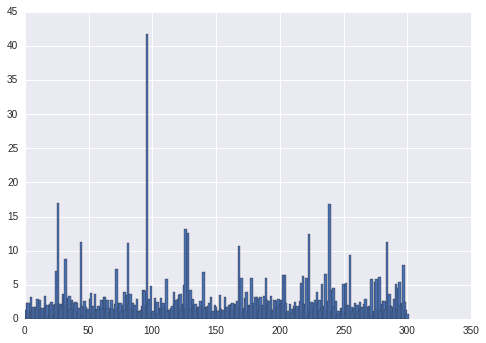

In [68]:
# sum over all documents and make a bar plot
plt.figure()
ss = np.sum(ms2lda_last.model.doc_topic_, axis=0)
ind = range(len(ss))
plt.bar(ind, ss, 2)
plt.show()

Averaging over the samples

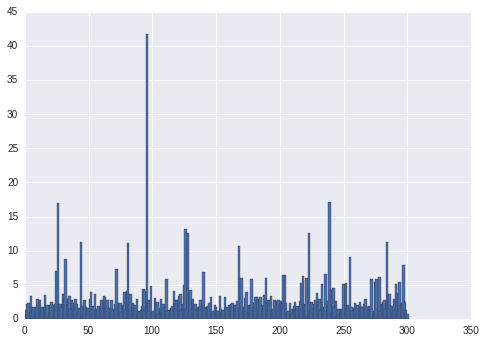

In [69]:
# sum over all documents and make a bar plot
plt.figure()
ss = np.sum(ms2lda_avg.model.doc_topic_, axis=0)
ind = range(len(ss))
plt.bar(ind, ss, 2)
plt.show()

<h3>Topic-Word distributions</h3>

For the last sample

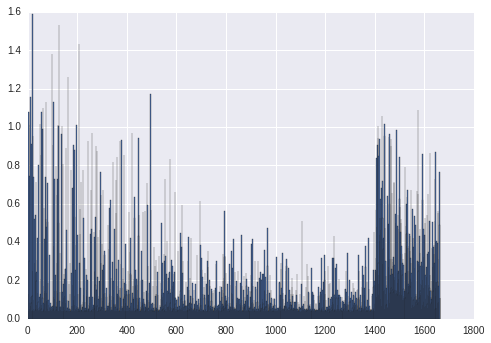

In [70]:
# sum over all topics and make a bar plot
ss = np.sum(ms2lda_last.model.topic_word_, axis=0)
ind = range(len(ss))
plt.bar(ind, ss, 2)
plt.show()

Averaging over the samples

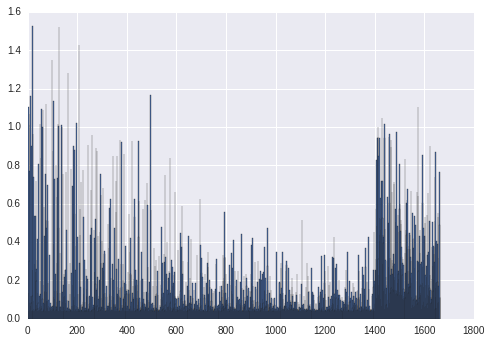

In [71]:
# sum over all topics and make a bar plot
ss = np.sum(ms2lda_avg.model.topic_word_, axis=0)
ind = range(len(ss))
plt.bar(ind, ss, 2)
plt.show()

<h3>Expected value of the top level Dirichlet-multinomial distribution</h3>

For the last sample

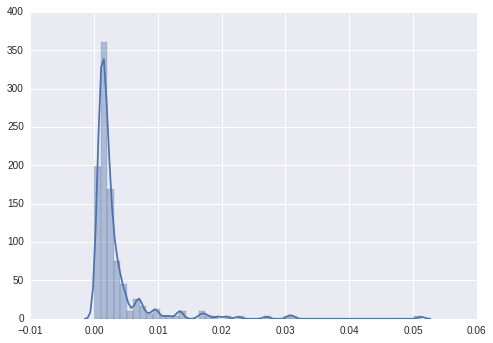

In [72]:
# plot histogram and KDE
posterior_alpha = ms2lda_last.model.posterior_alpha
posterior_alpha = posterior_alpha / np.sum(posterior_alpha)
sns.distplot(posterior_alpha)

Averaging over the samples

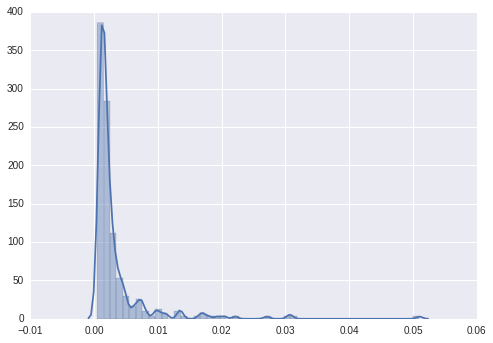

In [73]:
# plot histogram and KDE
posterior_alpha = ms2lda_avg.model.posterior_alpha
posterior_alpha = posterior_alpha / np.sum(posterior_alpha)
sns.distplot(posterior_alpha)